In [1]:
import pandas as pd
import glob
import os
import bnpy
import sys
import seaborn as sns
import collections
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/opt/hydra/')

import library.analysis as hydra

from functools import partial

In [2]:
help(np.argsort)

Help on function argsort in module numpy:

argsort(a, axis=-1, kind='quicksort', order=None)
    Returns the indices that would sort an array.
    
    Perform an indirect sort along the given axis using the algorithm specified
    by the `kind` keyword. It returns an array of indices of the same shape as
    `a` that index data along the given axis in sorted order.
    
    Parameters
    ----------
    a : array_like
        Array to sort.
    axis : int or None, optional
        Axis along which to sort.  The default is -1 (the last axis). If None,
        the flattened array is used.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm.
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A single field can
        be specified as a string, and not all fields need be specified,
        but unspecified fields will still be used

In [5]:
a

,1
0,
TH03_0112_S01,1
TH03_0112_S02,1
THR39_1360_S01,0
THR39_1361_S01,1
THR39_1362_S01,1
THR39_1363_S01,0
THR39_1364_S01,0
THR39_1365_S01,1
THR39_1366_S01,1


In [12]:
hits = None
assignments = {}
samples = None
size_key = {}

for pth in glob.glob("../fit/sweep-output/output/MultivariateAnalysis/*"):    
    _a = os.path.join(pth, 'assignments.tsv')
    a = pd.read_csv(_a, sep='\t', header=None, index_col=0)
    
    if samples is None:
        samples = list(a.index.values)
        hits = pd.DataFrame(index=samples)
    
    if a[1].sum() > 0 :
        num_clusters = max(a[1].values)
        gs = os.path.basename(pth)
        model = bnpy.ioutil.ModelReader.load_model_at_prefix(pth,
                                                             prefix=gs)
        probs = model.allocModel.get_active_comp_probs()
        
        max_kl = None
        means = []
        for i in range(len(probs)):
            for j in range(len(probs)):
                if i == j:
                    continue
                
                mi = model.obsModel.get_mean_for_comp(i)
                means.append(list(mi))
                
                Si = model.obsModel.get_covar_mat_for_comp(i)
                
                mj = model.obsModel.get_mean_for_comp(j)
                Sj = model.obsModel.get_covar_mat_for_comp(j)
                
                kl = hydra.kl(mi, Si, mj, Sj)
                
                if kl > max_kl:
                    max_kl = kl
                    
        size_key[gs] = {}
        sortd = sorted(means, key=lambda x: sum(x) )
        _argsort = [sortd.index(x) for x in means]
        
        for i, v in enumerate(_argsort):
            size_key[gs][i] = v
             
        print(gs)
        for sample in samples:
            hits.loc[sample, gs] = size_key[gs][a.loc[sample].item()]

REACTOME_NOTCH1_INTRACELLULAR_DOMAIN_REGULATES_TRANSCRIPTION
HALLMARK_WNT_BETA_CATENIN_SIGNALING
REACTOME_O_LINKED_GLYCOSYLATION_OF_MUCINS
BIOCARTA_HIVNEF_PATHWAY
PID_AVB3_OPN_PATHWAY
NABA_MATRISOME
REACTOME_NONSENSE_MEDIATED_DECAY_ENHANCED_BY_THE_EXON_JUNCTION_COMPLEX
PID_BARD1_PATHWAY
REACTOME_GLUCONEOGENESIS
BIOCARTA_CTCF_PATHWAY
REACTOME_POST_NMDA_RECEPTOR_ACTIVATION_EVENTS
REACTOME_TRNA_AMINOACYLATION
KEGG_CARDIAC_MUSCLE_CONTRACTION
REACTOME_INFLUENZA_LIFE_CYCLE
REACTOME_UNFOLDED_PROTEIN_RESPONSE
PID_DELTA_NP63_PATHWAY
KEGG_STARCH_AND_SUCROSE_METABOLISM
REACTOME_CA_DEPENDENT_EVENTS
REACTOME_SIGNALING_BY_NOTCH1
PID_AR_PATHWAY
BIOCARTA_RACCYCD_PATHWAY
HALLMARK_ANDROGEN_RESPONSE
BIOCARTA_MCM_PATHWAY
REACTOME_ACTIVATION_OF_GENES_BY_ATF4
REACTOME_FORMATION_OF_THE_TERNARY_COMPLEX_AND_SUBSEQUENTLY_THE_43S_COMPLEX
HALLMARK_APICAL_SURFACE
KEGG_PURINE_METABOLISM
REACTOME_SEMAPHORIN_INTERACTIONS
KEGG_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM
PID_ERA_GENOMIC_PATHWAY
REACTOME_MRNA_3_END_PROCESSING

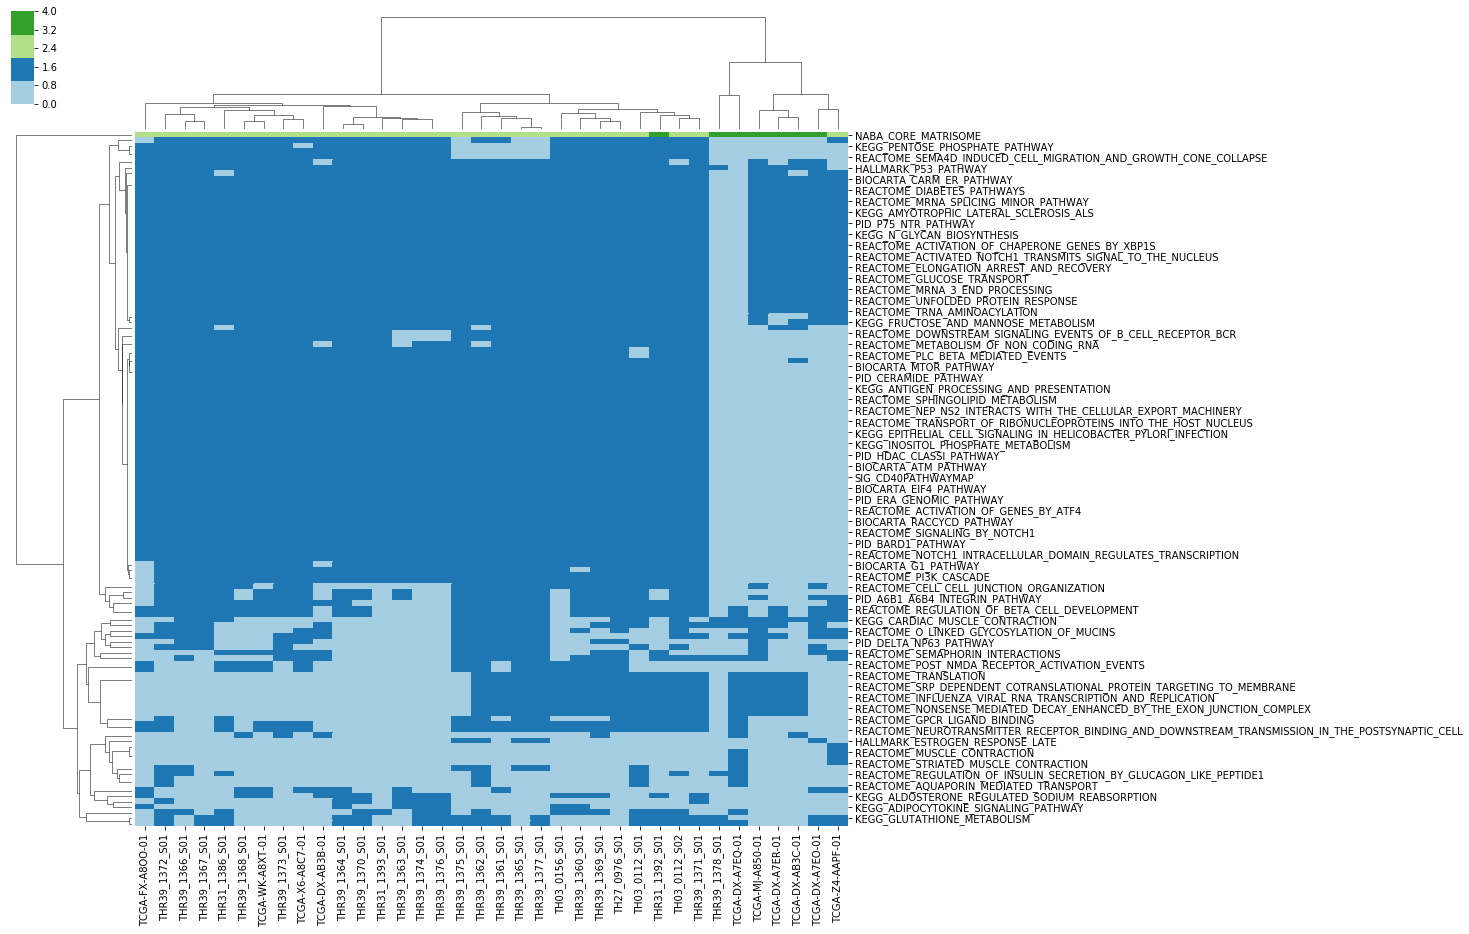

In [25]:
sns.clustermap(hits.T,
               metric='hamming',
               figsize=(15, 15),
               cmap=sns.color_palette("Paired", 4))

In [39]:
size_key

{'BIOCARTA_ARAP_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_ATM_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_CARM_ER_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_CTCF_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_EIF4_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_G1_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_HIVNEF_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_MCM_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_MTOR_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_PML_PATHWAY': {0: 1, 1: -1},
 'BIOCARTA_RACCYCD_PATHWAY': {0: 1, 1: -1},
 'HALLMARK_ANDROGEN_RESPONSE': {0: 1, 1: -1},
 'HALLMARK_APICAL_SURFACE': {0: -1, 1: 1},
 'HALLMARK_ESTROGEN_RESPONSE_LATE': {0: -1, 1: 1},
 'HALLMARK_HYPOXIA': {0: 1, 1: -1},
 'HALLMARK_MYOGENESIS': {0: -1, 1: 1},
 'HALLMARK_P53_PATHWAY': {0: 1, 1: -1},
 'HALLMARK_WNT_BETA_CATENIN_SIGNALING': {0: 1, 1: -1},
 'KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY': {0: -1, 1: 1},
 'KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION': {0: -1, 1: 1},
 'KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS': {0: 1, 1: -1},
 'KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION': {0: 1, 1: -

In [16]:
hits = pd.DataFrame(columns=['gs', 'num_clusters', 'min_prob', 'max_kl'])
assignments = {}
samples = None
for pth in glob.glob("../sweep-output/output/MultivariateAnalysis/*"):
    _a = os.path.join(pth, 'assignments.tsv')
    a = pd.read_csv(_a, sep='\t', header=None, index_col=0)
    if samples is None:
        samples = list(a.index.values)
    
    if a[1].sum() > 0 :
        num_clusters = max(a[1].values)
        gs = os.path.basename(pth)
        model = bnpy.ioutil.ModelReader.load_model_at_prefix(pth,
                                                             prefix=gs)
        probs = model.allocModel.get_active_comp_probs()
        
        max_kl = None
        for i in range(len(probs)):
            for j in range(len(probs)):
                if i == j:
                    continue
                
                mi = model.obsModel.get_mean_for_comp(i)
                Si = model.obsModel.get_covar_mat_for_comp(i)
                
                mj = model.obsModel.get_mean_for_comp(j)
                Sj = model.obsModel.get_covar_mat_for_comp(j)
                
                kl = hydra.kl(mi, Si, mj, Sj)
                
                if kl > max_kl:
                    max_kl = kl
                    
        hits.loc[len(hits), :] = [gs, 
                                  len(probs), 
                                  min(probs),
                                  max_kl]
        
        assignments[gs] = a

In [3]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

ri = pd.DataFrame(index=assignments.keys(), columns=assignments.keys(), dtype=np.float64)
for gi in assignments.keys():
    ai = assignments[gi]
    ci = [ai.loc[x, 1] for x in samples]
    for gj in assignments.keys():
        aj = assignments[gj]
        cj = [aj.loc[x, 1] for x in samples]
        rand = adjusted_rand_score(ci, cj)
        ri.loc[gi, gj] = rand

In [9]:
def fancy_dendrogram(*args, **kwargs):
    """
    Code was adapted from:
    https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

    :param args:
    :param kwargs:
    :return:
    """
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


In [10]:
from scipy.stats import ttest_ind
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster, dendrogram

method='average'
metric='euclidean'
row_linkage = hierarchy.linkage(distance.pdist(ri.values), method=method, metric=metric)
col_linkage = hierarchy.linkage(distance.pdist(ri.values.T), method=method, metric=metric)

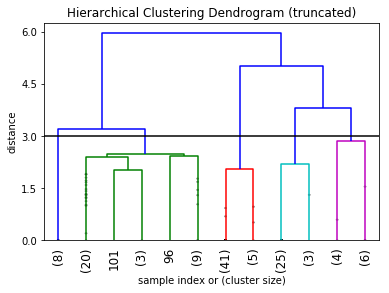

In [22]:
dist = 3

fancy_dendrogram(
            row_linkage,
            truncate_mode='lastp',
            p=12,
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,
            annotate_above=10,
            max_d=dist,
        )
plt.show()

clusters = fcluster(row_linkage,
                    dist,
                    criterion='distance')

groups = collections.defaultdict(list)
for gene, cluster in zip(ri.index.values,
                         clusters):
    groups[cluster].append(gene)

In [29]:
with open('synovial-sarcoma-5-gs-clusters.tsv', 'w') as f:
    f.write("cluster\tgene-sets\n")
    for i, gss in groups.items():
        f.write("%d\t%s\n" % (i, '\t'.join(gss)))

In [ ]:
clusters = fcluster(self.row_linkage,
                            dist,
                            criterion='distance')

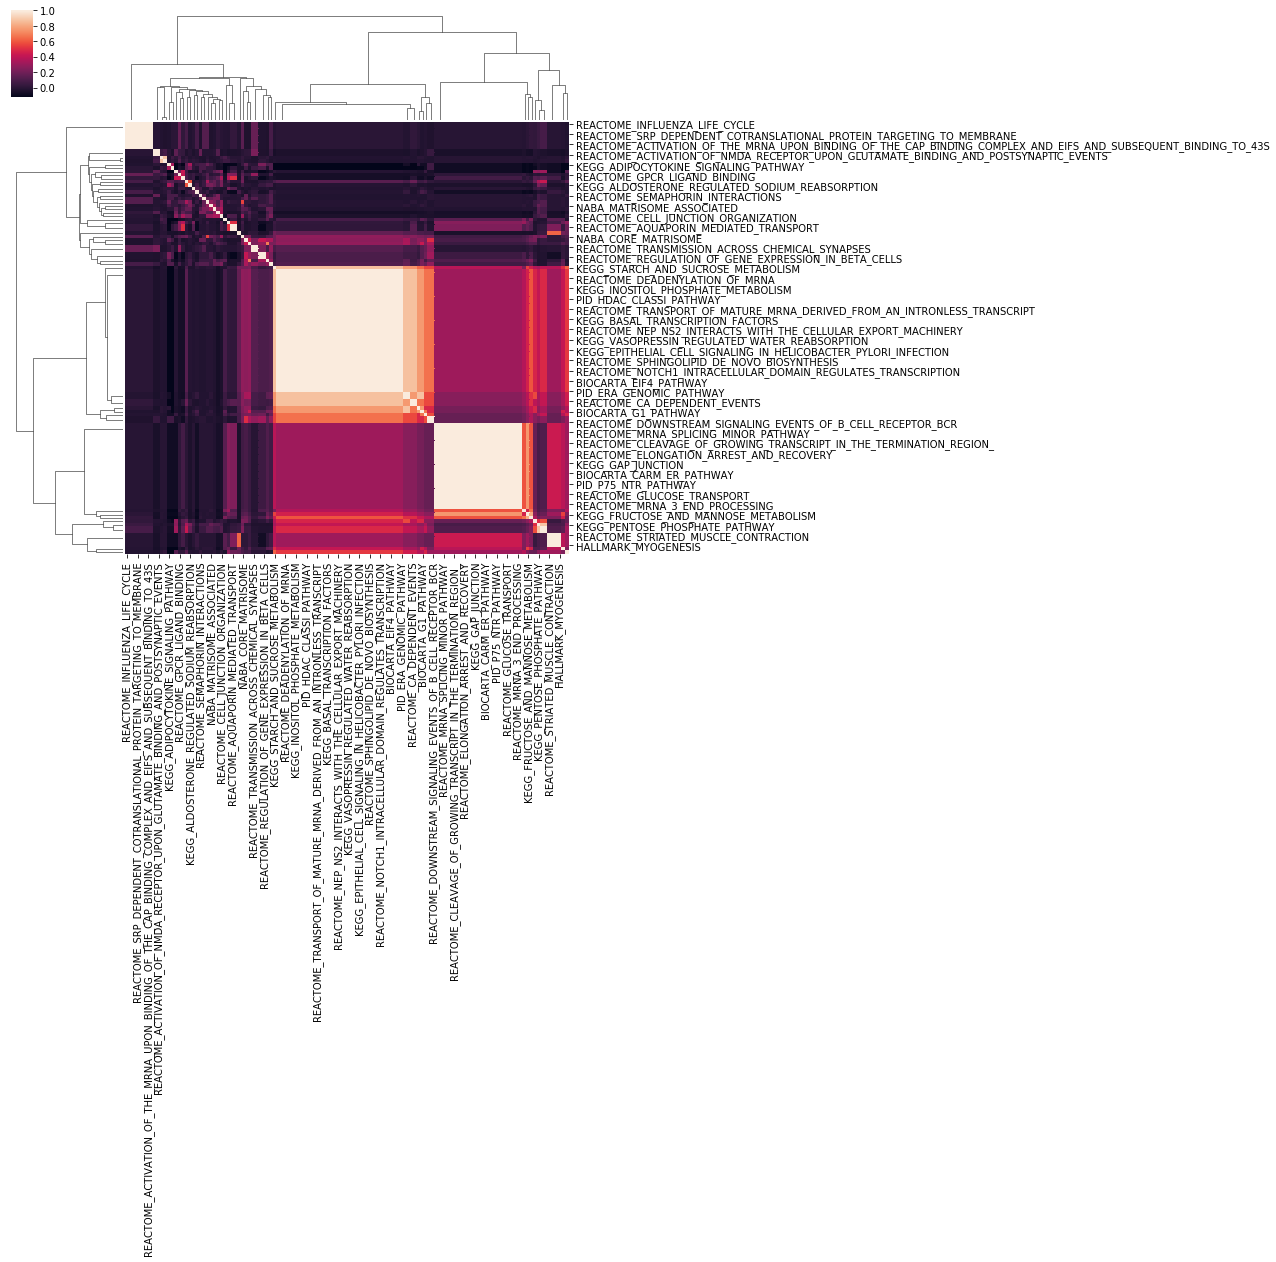

In [6]:
import seaborn as sns

sns.clustermap(ri, row_linkage=row_linkage, col_linkage=col_linkage)

In [7]:
hits.sort_values("num_clusters", ascending=False).head()

,gs,num_clusters,min_prob,max_kl
0,REACTOME_NOTCH1_INTRACELLULAR_DOMAIN_REGULATES...,2,0.175829,35.6027


In [81]:
hits.sort_values('min_prob', ascending=False).head(80)#.to_csv("hydra-gene-set-clustering-scan.tsv", sep='\t')

,gs,num_clusters,min_prob,max_kl
35,KEGG_GLUTATHIONE_METABOLISM,2,0.433532,73.2717
12,KEGG_CARDIAC_MUSCLE_CONTRACTION,2,0.431655,26.1309
27,REACTOME_SEMAPHORIN_INTERACTIONS,2,0.410174,48.1825
45,NABA_MATRISOME_ASSOCIATED,2,0.409938,286.411
84,KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450,2,0.409938,80.7419
113,PID_UPA_UPAR_PATHWAY,2,0.409617,60.7482
83,KEGG_CELL_ADHESION_MOLECULES_CAMS,2,0.408658,55.2283
2,REACTOME_O_LINKED_GLYCOSYLATION_OF_MUCINS,2,0.40328,30.9789
73,REACTOME_SRP_DEPENDENT_COTRANSLATIONAL_PROTEIN...,2,0.386364,305.591
92,REACTOME_ACTIVATION_OF_THE_MRNA_UPON_BINDING_O...,2,0.386364,343.741


In [70]:
hits.sort_values('max_kl', ascending=False).shape

(126, 4)

In [2]:
# REACTOME_TRANSLATION

gs = 'REACTOME_PI_3K_CASCADE'
pth = os.path.join("../sweep-output/output/MultivariateAnalysis", gs)
ass = pd.read_csv(os.path.join(pth, 'assignments.tsv'), sep='\t', index_col=0, header=None)
order = ass.sort_values(1).index.values
exp = pd.read_csv(os.path.join(pth, 'training-data.tsv'), sep='\t', index_col=0)
sns.clustermap(exp.reindex(order, axis=1), 
               z_score=0, 
               col_cluster=False, 
               figsize=(10, 10), 
               method='ward',
               cmap=sns.diverging_palette(240, 10, n=7))

IOError: [Errno 2] File ../sweep-output/output/MultivariateAnalysis/REACTOME_PI_3K_CASCADE/assignments.tsv does not exist: '../sweep-output/output/MultivariateAnalysis/REACTOME_PI_3K_CASCADE/assignments.tsv'

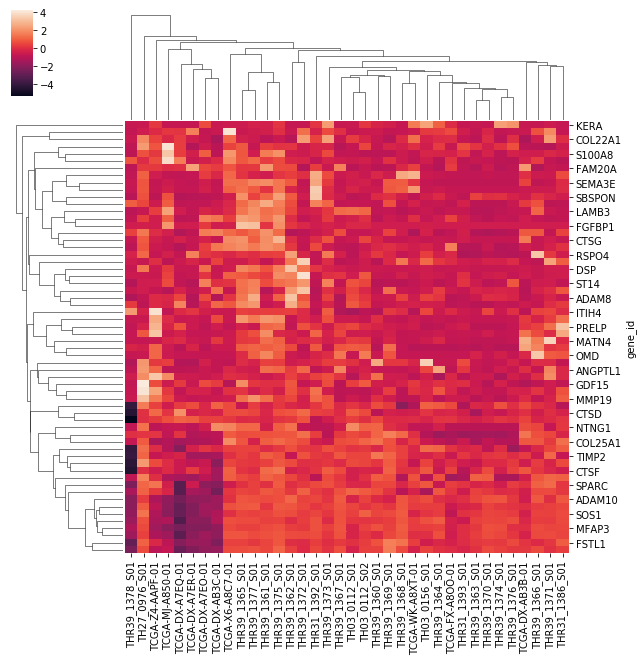